In [1]:
## Import some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

## Data Loading and Describe

In [2]:
## Load the dataset
data = pd.read_csv(r"C:\Users\Yash Kumar\Documents\barkingdelish-attachments (1)\Food insecurity.csv")

In [3]:
## Load the top 5 data
data.head(5)

,seq_id,ct10_id,municipal,nhd,county,years,pop,fi_p,unemp_p,pov_p,...,homeown_p,fi_num,snapbelowp,snapabovep,cost_index,short_week,short_year,weightcost,meal_gap,omad_goal
0,1,25025110601,Boston,West Roxbury,Suffolk,2015,2946.0,10.7,9.8,9.6,...,78.2,320.0,82.2,17.8,1.212,21.07,201000.0,3.56,56600.0,18900.0
1,2,25025130100,Boston,West Roxbury,Suffolk,2015,6517.0,6.1,2.9,3.3,...,74.2,400.0,82.2,17.8,1.212,21.07,254000.0,3.56,71400.0,23800.0
2,3,25025130200,Boston,West Roxbury,Suffolk,2015,5008.0,7.9,2.9,8.9,...,62.3,400.0,82.2,17.8,1.212,21.07,253000.0,3.56,71000.0,23700.0
3,4,25025130300,Boston,West Roxbury,Suffolk,2015,4680.0,6.4,7.3,0.2,...,77.8,300.0,82.2,17.8,1.212,21.07,191000.0,3.56,53800.0,17900.0
4,5,25025130402,Boston,West Roxbury,Suffolk,2015,4908.0,7.8,4.7,7.0,...,74.2,380.0,82.2,17.8,1.212,21.07,245000.0,3.56,68700.0,22900.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   seq_id      1090 non-null   int64  
 1   ct10_id     1090 non-null   int64  
 2   municipal   1090 non-null   object 
 3   nhd         169 non-null    object 
 4   county      1090 non-null   object 
 5   years       1090 non-null   int64  
 6   pop         1088 non-null   float64
 7   fi_p        1090 non-null   float64
 8   unemp_p     1090 non-null   float64
 9   pov_p       1090 non-null   float64
 10  mhi         1088 non-null   float64
 11  aa_p        1090 non-null   float64
 12  lat_p       1090 non-null   float64
 13  homeown_p   1090 non-null   float64
 14  fi_num      1088 non-null   float64
 15  snapbelowp  1090 non-null   float64
 16  snapabovep  1090 non-null   float64
 17  cost_index  1090 non-null   float64
 18  short_week  1090 non-null   float64
 19  short_year  1088 non-null  

<AxesSubplot:>

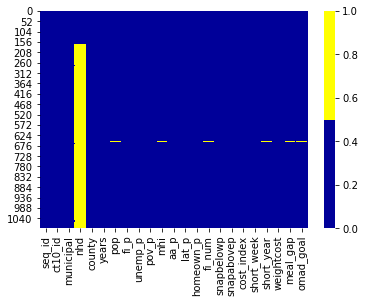

In [5]:
cols = data.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
# So in this dataset you have seen nhd means neighbourhood column is empty

In [6]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))

seq_id - 0.0%
ct10_id - 0.0%
municipal - 0.0%
nhd - 84.4954128440367%
county - 0.0%
years - 0.0%
pop - 0.1834862385321101%
fi_p - 0.0%
unemp_p - 0.0%
pov_p - 0.0%
mhi - 0.1834862385321101%
aa_p - 0.0%
lat_p - 0.0%
homeown_p - 0.0%
fi_num - 0.1834862385321101%
snapbelowp - 0.0%
snapabovep - 0.0%
cost_index - 0.0%
short_week - 0.0%
short_year - 0.1834862385321101%
weightcost - 0.0%
meal_gap - 0.1834862385321101%
omad_goal - 0.1834862385321101%


In [7]:
data.isnull().sum()

seq_id          0
ct10_id         0
municipal       0
nhd           921
county          0
years           0
pop             2
fi_p            0
unemp_p         0
pov_p           0
mhi             2
aa_p            0
lat_p           0
homeown_p       0
fi_num          2
snapbelowp      0
snapabovep      0
cost_index      0
short_week      0
short_year      2
weightcost      0
meal_gap        2
omad_goal       2
dtype: int64

In [8]:
data.describe()

,seq_id,ct10_id,years,pop,fi_p,unemp_p,pov_p,mhi,aa_p,lat_p,homeown_p,fi_num,snapbelowp,snapabovep,cost_index,short_week,short_year,weightcost,meal_gap,omad_goal
count,1090.000000,1.090000e+03,1090.0,1088.000000,1090.000000,1090.000000,1090.000000,1088.000000,1090.000000,1090.000000,1090.000000,1088.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.088000e+03,1090.000000,1088.000000,1088.000000
mean,545.500000,2.501634e+10,2015.0,4644.183824,11.676697,7.588899,12.080000,76627.317096,9.885413,10.729083,59.323670,518.226103,65.547431,34.452569,1.175458,20.426385,3.211507e+05,3.453312,92972.334559,30989.338235
std,314.800201,7.393353e+06,0.0,1650.582214,6.469247,4.083164,10.692439,33493.285579,15.368389,15.494427,25.571941,307.211509,11.209925,11.209925,0.051002,0.888299,1.927312e+05,0.148554,55099.979357,18367.272110
min,1.000000,2.500101e+10,2015.0,420.000000,0.000000,0.000000,0.000000,12142.000000,0.000000,0.000000,0.000000,10.000000,49.000000,17.800000,1.080000,18.770000,3.000000e+03,3.180000,1000.000000,300.000000
25%,273.250000,2.500922e+10,2015.0,3368.500000,7.200000,4.800000,4.400000,52601.750000,1.600000,2.000000,38.525000,310.000000,57.700000,22.700000,1.138000,19.770000,1.947500e+05,3.340000,55775.000000,18600.000000
50%,545.500000,2.501735e+10,2015.0,4547.000000,10.000000,6.800000,8.100000,72988.000000,4.150000,4.850000,63.750000,450.000000,59.500000,40.500000,1.189000,20.660000,2.795000e+05,3.490000,80700.000000,26900.000000
75%,817.750000,2.502351e+10,2015.0,5744.250000,14.500000,9.300000,16.600000,95209.000000,10.475000,11.700000,81.500000,630.000000,77.300000,42.300000,1.211000,21.040000,3.872500e+05,3.560000,113025.000000,37700.000000
max,1090.000000,2.502598e+10,2015.0,9440.000000,51.400000,34.700000,67.300000,217583.000000,93.600000,97.700000,99.200000,2090.000000,82.200000,51.000000,1.303000,22.650000,1.332000e+06,3.830000,374100.000000,124700.000000


In [9]:
data.shape

(1090, 23)

## Data Cleaning

In [10]:
# In this data set I have seen many null values so handle these values.
data['nhd'].value_counts()
# In this column so much null values which is 921 out of 1090 which is approximately 85%, so I thing this column doesn't effect so much dataset if this column drop.

Dorchester          27
Allston/Brighton    18
Roxbury             16
East Boston         12
Mattapan            11
South Boston        11
Jamaica Plain       10
South End            8
Fenway/Kenmore       8
West Roxbury         7
Roslindale           7
Charlestown          6
Hyde Park            6
Back Bay             5
North End            4
Mission Hill         4
Beacon Hill          3
Downtown             2
West End             2
Chinatown            1
Bay Village          1
Name: nhd, dtype: int64

In [11]:
data_1 =  data.drop('nhd', axis = 1)

In [12]:
data_1.shape

(1090, 22)

In [13]:
data_1.isnull().sum()

seq_id        0
ct10_id       0
municipal     0
county        0
years         0
pop           2
fi_p          0
unemp_p       0
pov_p         0
mhi           2
aa_p          0
lat_p         0
homeown_p     0
fi_num        2
snapbelowp    0
snapabovep    0
cost_index    0
short_week    0
short_year    2
weightcost    0
meal_gap      2
omad_goal     2
dtype: int64

In [14]:
## Fill all these null values with median values because now all null values now integer or float number.
data_2 = data_1.fillna(data_1.median())

<AxesSubplot:>

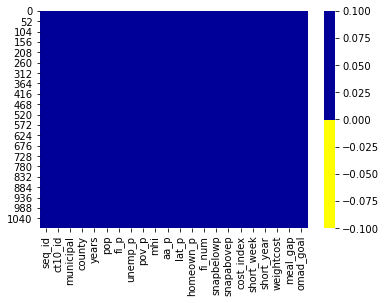

In [15]:
cols = data_2.columns[:] 
colours = [ '#ffff00','#000099'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_2[cols].isnull(), cmap=sns.color_palette(colours))
# So now there are no empty column in dataset

In [16]:
data_2.isnull().sum()

seq_id        0
ct10_id       0
municipal     0
county        0
years         0
pop           0
fi_p          0
unemp_p       0
pov_p         0
mhi           0
aa_p          0
lat_p         0
homeown_p     0
fi_num        0
snapbelowp    0
snapabovep    0
cost_index    0
short_week    0
short_year    0
weightcost    0
meal_gap      0
omad_goal     0
dtype: int64

In [17]:
print(data_2.columns.values)

['seq_id' 'ct10_id' 'municipal' 'county' 'years' 'pop' 'fi_p' 'unemp_p'
 'pov_p' 'mhi' 'aa_p' 'lat_p' 'homeown_p' 'fi_num' 'snapbelowp'
 'snapabovep' 'cost_index' 'short_week' 'short_year' 'weightcost'
 'meal_gap' 'omad_goal']


In [18]:
## Now in this dataset only 2 object variables and other 20 integer or float variable.
data_2['county'].value_counts()

Middlesex     317
Suffolk       192
Essex         162
Norfolk       130
Bristol       125
Plymouth       99
Barnstable     56
Nantucket       5
Dukes           4
Name: county, dtype: int64

In [19]:
data_2['municipal'].value_counts()

Boston            169
Cambridge          32
New Bedford        31
Fall River         25
Lowell             25
                 ... 
Ashby               1
Millis              1
Merrimac            1
Boxborough          1
Beverly; Salem      1
Name: municipal, Length: 194, dtype: int64

In [20]:
# That's mean dataset available only 2015 year. 
data_2['years'].value_counts()

2015    1090
Name: years, dtype: int64

In [21]:
## 2 columns which is seq_id and ct10_id, not much necessary in this dataset. So I remove these columns in data_2 dataset.
data_3 = data_2.drop('seq_id', axis = 1)
data_3 = data_3.drop('ct10_id', axis = 1)

In [22]:
# So In this dataset there are no dupicated value 
data_3.duplicated().sum()

0

In [23]:
# Now I thing Data cleaning portion is complete, the next part is data analysis
data_3.shape


(1090, 20)

## Descriptive Analysis(Data Wrangling & Aggregation) and Visualization


In [24]:
data_3.head()

,municipal,county,years,pop,fi_p,unemp_p,pov_p,mhi,aa_p,lat_p,homeown_p,fi_num,snapbelowp,snapabovep,cost_index,short_week,short_year,weightcost,meal_gap,omad_goal
0,Boston,Suffolk,2015,2946.0,10.7,9.8,9.6,87426.0,5.0,4.7,78.2,320.0,82.2,17.8,1.212,21.07,201000.0,3.56,56600.0,18900.0
1,Boston,Suffolk,2015,6517.0,6.1,2.9,3.3,79844.0,1.7,3.7,74.2,400.0,82.2,17.8,1.212,21.07,254000.0,3.56,71400.0,23800.0
2,Boston,Suffolk,2015,5008.0,7.9,2.9,8.9,100952.0,2.0,5.1,62.3,400.0,82.2,17.8,1.212,21.07,253000.0,3.56,71000.0,23700.0
3,Boston,Suffolk,2015,4680.0,6.4,7.3,0.2,108472.0,2.3,5.8,77.8,300.0,82.2,17.8,1.212,21.07,191000.0,3.56,53800.0,17900.0
4,Boston,Suffolk,2015,4908.0,7.8,4.7,7.0,66394.0,2.0,5.8,74.2,380.0,82.2,17.8,1.212,21.07,245000.0,3.56,68700.0,22900.0


In [25]:
data_3.columns

Index(['municipal', 'county', 'years', 'pop', 'fi_p', 'unemp_p', 'pov_p',
       'mhi', 'aa_p', 'lat_p', 'homeown_p', 'fi_num', 'snapbelowp',
       'snapabovep', 'cost_index', 'short_week', 'short_year', 'weightcost',
       'meal_gap', 'omad_goal'],
      dtype='object')

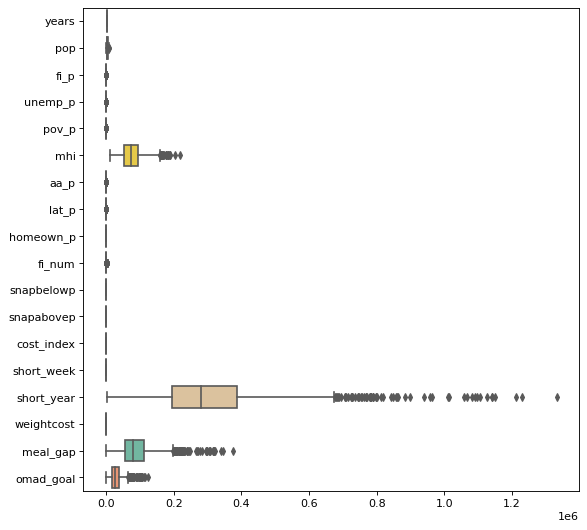

In [26]:
plt.figure(figsize=(8, 8), dpi=80)
df = data_3[[ 'municipal', 'county', 'years', 'pop', 'fi_p', 'unemp_p', 'pov_p',
       'mhi', 'aa_p', 'lat_p', 'homeown_p', 'fi_num', 'snapbelowp',
       'snapabovep', 'cost_index', 'short_week', 'short_year', 'weightcost',
       'meal_gap', 'omad_goal']]
ax = sns.boxplot(data= df, orient="h", palette="Set2")
# Here I can see some of columns so much outliers like mhi(Median Household Income), short year(Total food-budget shortfall reported by the Food Insecure Individual), meal gap and omad goal(1 Meal A Day Goal).

array([[<AxesSubplot:title={'center':'years'}>,
        <AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'fi_p'}>,
        <AxesSubplot:title={'center':'unemp_p'}>],
       [<AxesSubplot:title={'center':'pov_p'}>,
        <AxesSubplot:title={'center':'mhi'}>,
        <AxesSubplot:title={'center':'aa_p'}>,
        <AxesSubplot:title={'center':'lat_p'}>],
       [<AxesSubplot:title={'center':'homeown_p'}>,
        <AxesSubplot:title={'center':'fi_num'}>,
        <AxesSubplot:title={'center':'snapbelowp'}>,
        <AxesSubplot:title={'center':'snapabovep'}>],
       [<AxesSubplot:title={'center':'cost_index'}>,
        <AxesSubplot:title={'center':'short_week'}>,
        <AxesSubplot:title={'center':'short_year'}>,
        <AxesSubplot:title={'center':'weightcost'}>],
       [<AxesSubplot:title={'center':'meal_gap'}>,
        <AxesSubplot:title={'center':'omad_goal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

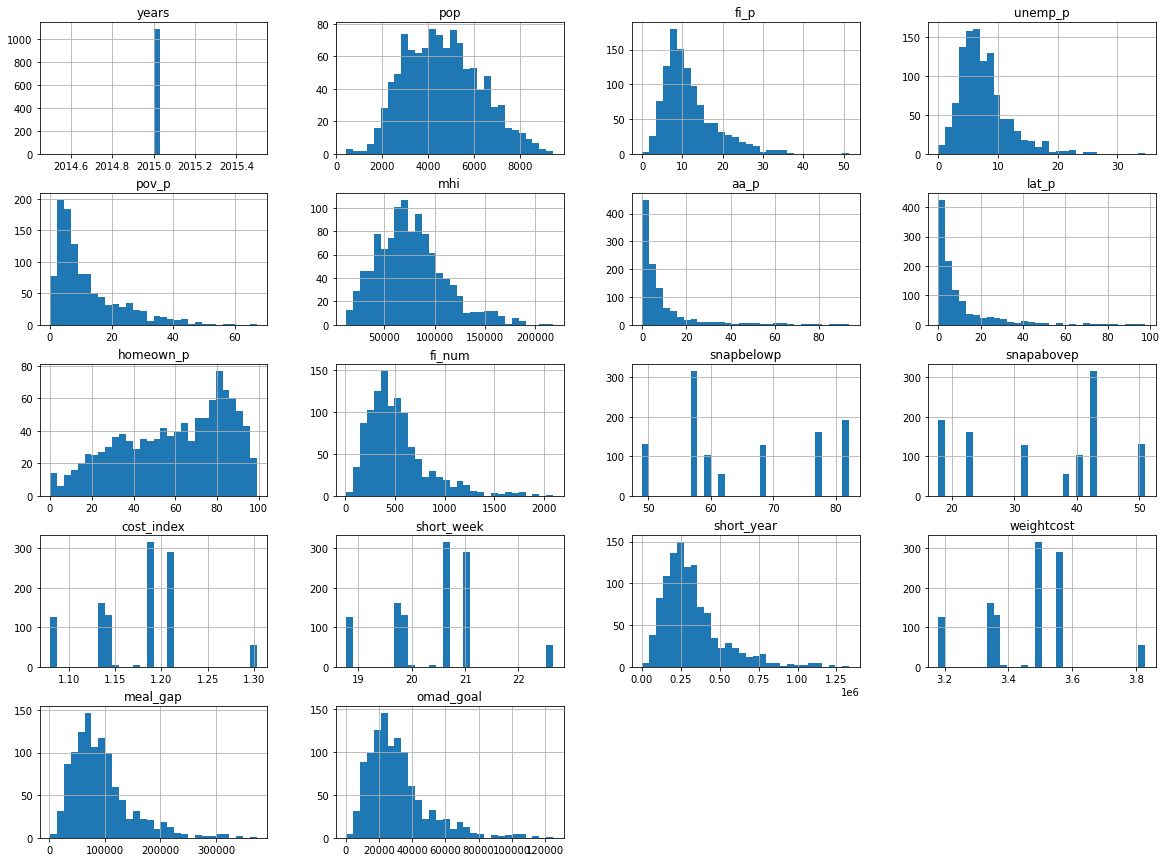

In [27]:
# histogram of life_sq.
df.hist(bins=30, figsize=(20, 15))
# In this histgram we can see the univarient outliers in many columns.

In [28]:
# Removing Outliers using percentile method of univariate outliers.
# For fi_p (food insecurity)
min_thresold, max_thresold = df.fi_p.quantile([0.001, 0.999])
df1 = df[(df.fi_p<max_thresold) & (df.fi_p>min_thresold)]
# For unemp_p(unemployment)
min_thresold, max_thresold = df1.unemp_p.quantile([0.001, 0.999])
df2 = df1[(df1.unemp_p<max_thresold) & (df1.unemp_p>min_thresold)]
# For pov_p(poverty rate)
min_thresold, max_thresold = df2.pov_p.quantile([0.001, 0.999])
df3 = df2[(df2.pov_p<max_thresold) & (df2.pov_p>min_thresold)]
# For mhi (Median Household Income)
min_thresold, max_thresold = df3.mhi.quantile([0.001, 0.999])
df4 = df3[(df3.mhi<max_thresold) & (df3.mhi>min_thresold)]
# For aa_p (% Black or African American Population)
min_thresold, max_thresold = df4.aa_p.quantile([0.001, 0.999])
df5 = df4[(df4.aa_p<max_thresold) & (df4.aa_p>min_thresold)]
# For lat_p (% Hispanic or Latino Population	)
min_thresold, max_thresold = df5.lat_p.quantile([0.001, 0.999])
df6 = df5[(df5.lat_p<max_thresold) & (df5.lat_p>min_thresold)]
# For fi_num (Food Insecure Individuals)
min_thresold, max_thresold = df6.fi_num.quantile([0.001, 0.999])
data_4 = df6[(df6.fi_num<max_thresold) & (df6.fi_num>min_thresold)]




data_4.shape

(1016, 20)

array([[<AxesSubplot:title={'center':'years'}>,
        <AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'fi_p'}>,
        <AxesSubplot:title={'center':'unemp_p'}>],
       [<AxesSubplot:title={'center':'pov_p'}>,
        <AxesSubplot:title={'center':'mhi'}>,
        <AxesSubplot:title={'center':'aa_p'}>,
        <AxesSubplot:title={'center':'lat_p'}>],
       [<AxesSubplot:title={'center':'homeown_p'}>,
        <AxesSubplot:title={'center':'fi_num'}>,
        <AxesSubplot:title={'center':'snapbelowp'}>,
        <AxesSubplot:title={'center':'snapabovep'}>],
       [<AxesSubplot:title={'center':'cost_index'}>,
        <AxesSubplot:title={'center':'short_week'}>,
        <AxesSubplot:title={'center':'short_year'}>,
        <AxesSubplot:title={'center':'weightcost'}>],
       [<AxesSubplot:title={'center':'meal_gap'}>,
        <AxesSubplot:title={'center':'omad_goal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

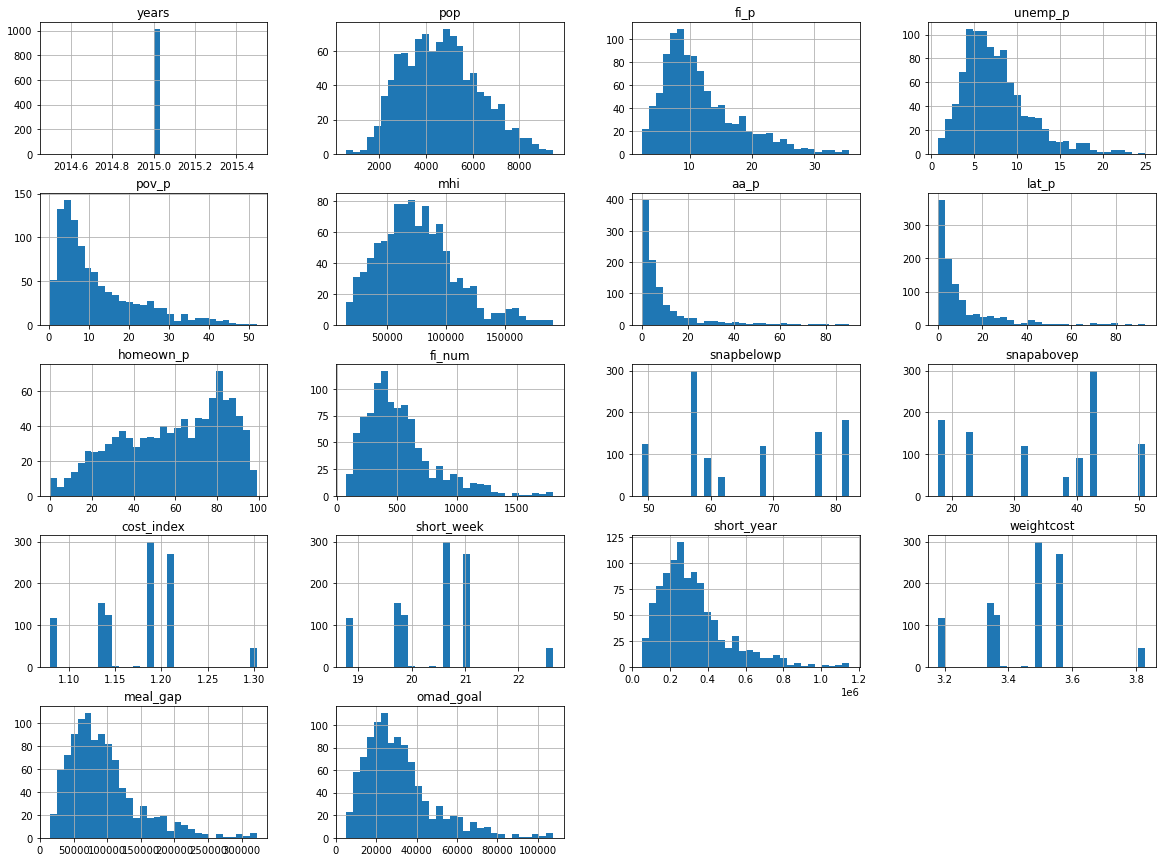

In [29]:
# histogram of life_sq.
data_4.hist(bins=30, figsize=(20, 15))

In [30]:
data_4.columns

Index(['municipal', 'county', 'years', 'pop', 'fi_p', 'unemp_p', 'pov_p',
       'mhi', 'aa_p', 'lat_p', 'homeown_p', 'fi_num', 'snapbelowp',
       'snapabovep', 'cost_index', 'short_week', 'short_year', 'weightcost',
       'meal_gap', 'omad_goal'],
      dtype='object')

In [31]:
data_4.shape

(1016, 20)

### Here in this dataset by seeing this correlation matrix their are 5 column which are highly correlated
### (1). meal_gap(The Meal Gap) and omad_goal (1 Meal a Day Goal)
### (2). cost_index(Cost of food index) and Short_week(Weekly food-budget shortfall per Food Insecure Individual)
### (3) cost_index(Cost of food index) and weightcost(Weighted cost per meal) are also highly correlated.
### (4) fi_num(Food Insecure Individuals) and meal_gap(The Meal Gap) are also highly correlated.
### (5) short_year(Total food-budget shortfall reported by the Food Insecure Individual) and fi_num(food insecure Individuals).
### So we can drop either of these two columns
### And one column is highly inverse correlated.
### (1) snapbelowp (% below SNAP threshold of 200% poverty) and snapabovep (% above SNAP threshold of 200% poverty)

<AxesSubplot:>

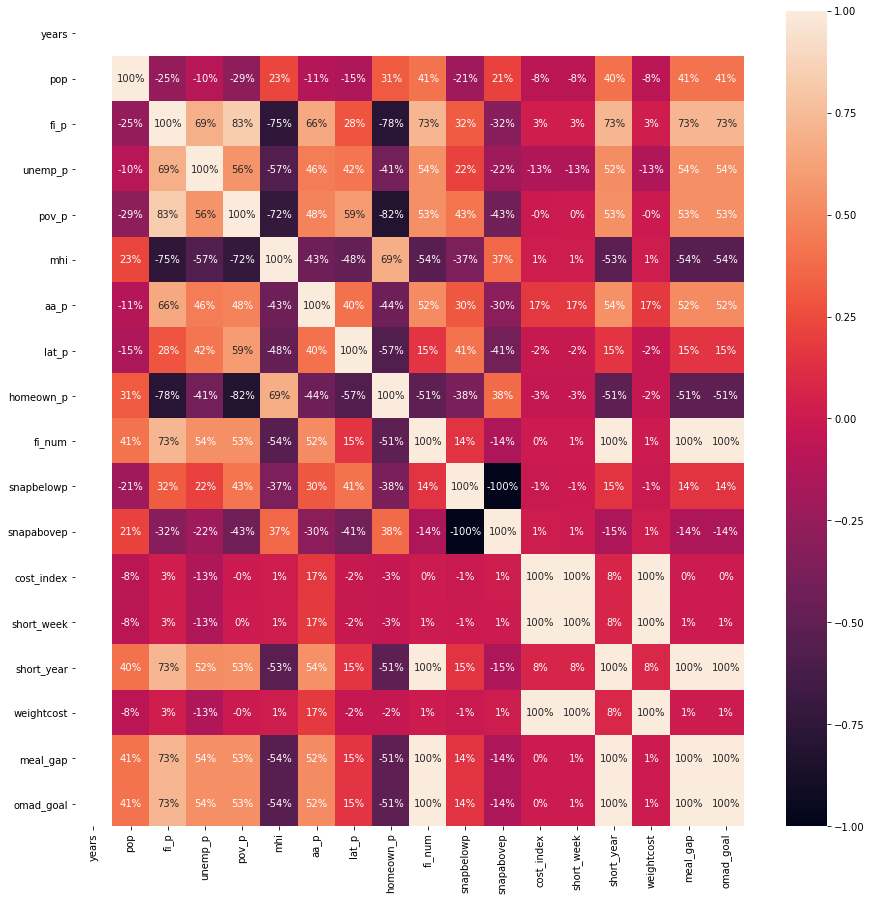

In [32]:
# See the relationship in each columns
## Correlation Matrix
plt.figure(figsize = (15,15))
sns.heatmap(data_4.iloc[:,2:].corr(), annot = True, fmt = '.0%')

In [33]:
# Create correlation matrix
corr_matrix = data_4.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data_4.drop(to_drop, axis=1, inplace=True)
data_4.shape

C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1016, 14)

<AxesSubplot:>

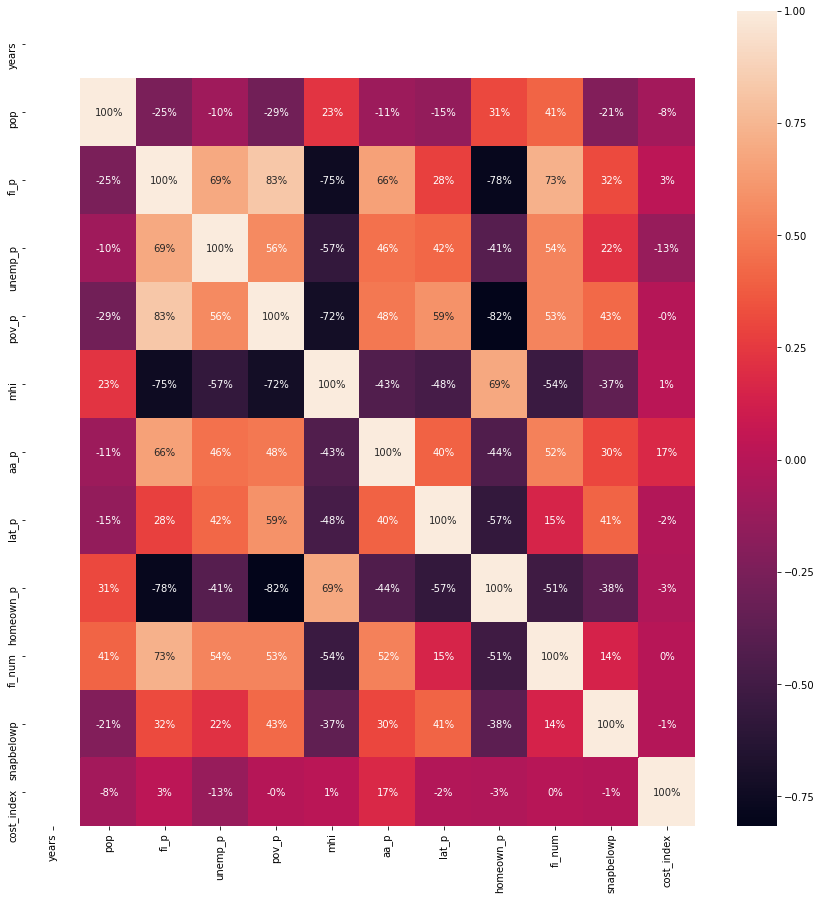

In [34]:
# See the relationship in each columns
## Correlation Matrix
plt.figure(figsize = (15,15))
sns.heatmap(data_4.iloc[:,2:].corr(), annot = True, fmt = '.0%')

### There are no need of Time Series Analysis in this dataset.

In [35]:
data_4.head(10)

,municipal,county,years,pop,fi_p,unemp_p,pov_p,mhi,aa_p,lat_p,homeown_p,fi_num,snapbelowp,cost_index
0,Boston,Suffolk,2015,2946.0,10.7,9.8,9.6,87426.0,5.0,4.7,78.2,320.0,82.2,1.212
1,Boston,Suffolk,2015,6517.0,6.1,2.9,3.3,79844.0,1.7,3.7,74.2,400.0,82.2,1.212
2,Boston,Suffolk,2015,5008.0,7.9,2.9,8.9,100952.0,2.0,5.1,62.3,400.0,82.2,1.212
4,Boston,Suffolk,2015,4908.0,7.8,4.7,7.0,66394.0,2.0,5.8,74.2,380.0,82.2,1.212
5,Boston,Suffolk,2015,3337.0,7.0,4.7,3.6,72976.0,8.0,16.5,59.3,230.0,82.2,1.212
6,Boston,Suffolk,2015,5399.0,18.8,5.7,18.3,41981.0,48.4,21.8,25.2,1020.0,82.2,1.212
7,Boston,Suffolk,2015,2371.0,13.5,3.0,13.0,114643.0,3.1,5.3,15.6,320.0,82.2,1.212
8,Boston,Suffolk,2015,3574.0,16.8,10.2,19.8,81607.0,9.2,16.4,27.2,600.0,82.2,1.212
9,Boston,Suffolk,2015,1700.0,30.5,13.9,42.7,15848.0,10.4,4.6,0.0,520.0,82.2,1.212
10,Boston,Suffolk,2015,5921.0,9.9,4.5,15.3,113068.0,6.9,16.0,47.5,590.0,82.2,1.212


In [36]:
data_4.columns

Index(['municipal', 'county', 'years', 'pop', 'fi_p', 'unemp_p', 'pov_p',
       'mhi', 'aa_p', 'lat_p', 'homeown_p', 'fi_num', 'snapbelowp',
       'cost_index'],
      dtype='object')

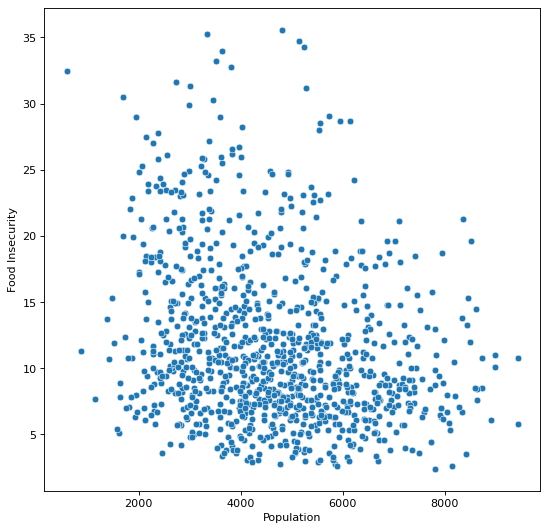

In [37]:

    #Scatterpblot
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="pop", y="fi_p", data=data_4)
plt.xlabel('Population')
plt.ylabel('Food Insecurity')
plt.show()
# In this scatter plot I analyze that which area population less there high food insecurity rather then high population.

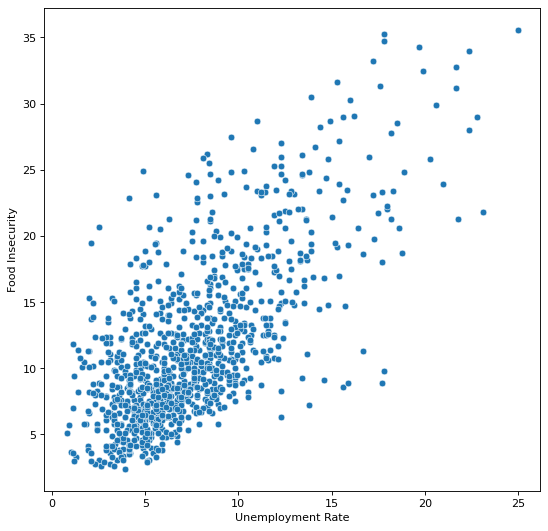

In [38]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="unemp_p", y="fi_p", data=data_4)
plt.xlabel('Unemployment Rate')
plt.ylabel('Food Insecurity')
plt.show()
# here Unemployment Rate directly propotion to food insecurity 

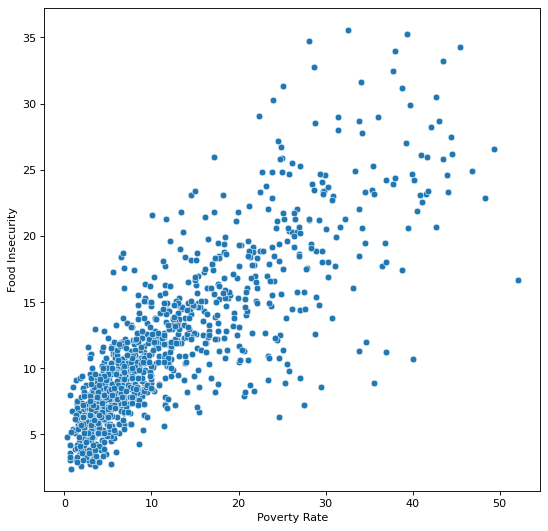

In [39]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="pov_p", y="fi_p", data=data_4)
plt.xlabel('Poverty Rate')
plt.ylabel('Food Insecurity')
plt.show()
# High poverty rate high food insecurity and less poverty rate less food insecurity.

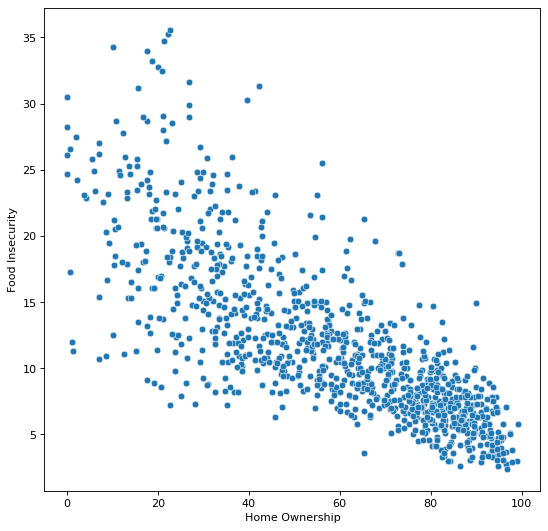

In [40]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="homeown_p", y="fi_p", data=data_4)
plt.xlabel('Home Ownership')
plt.ylabel('Food Insecurity')
plt.show()
# people who have high homeownership they have less food insecurity.

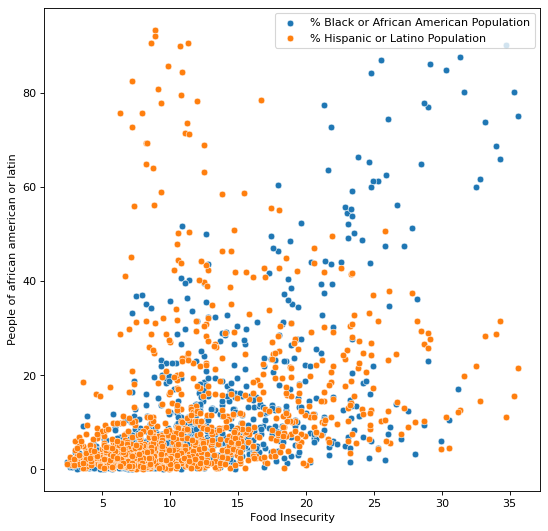

In [41]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(y="aa_p", x="fi_p",label='% Black or African American Population', data=data_4)

ax = sns.scatterplot(y="lat_p", x="fi_p",label='% Hispanic or Latino Population', data=data_4)
plt.xlabel('Food Insecurity')
plt.ylabel('People of african american or latin')
plt.show()
# In this graph I see that American African people highly insecured to getting food rather then hispanic or latino people
# You can clear see the crystel above orange and blue.

### Now I want to compare American African people and hispanic people in terms of Unemployment , poverty and Income

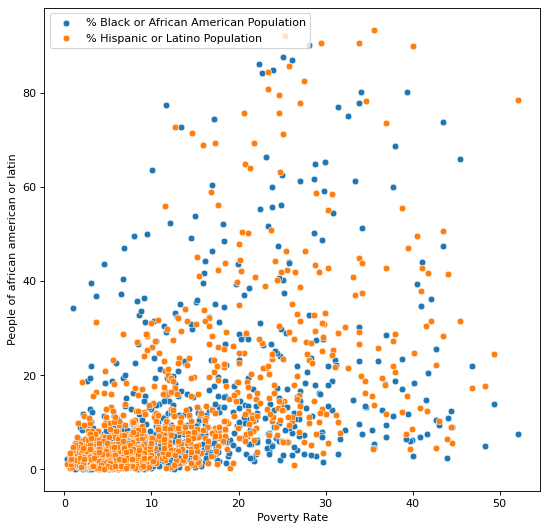

In [42]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(y="aa_p", x="pov_p",label='% Black or African American Population', data=data_4)

ax = sns.scatterplot(y="lat_p", x="pov_p",label='% Hispanic or Latino Population', data=data_4)
plt.xlabel('Poverty Rate')
plt.ylabel('People of african american or latin')
plt.show()

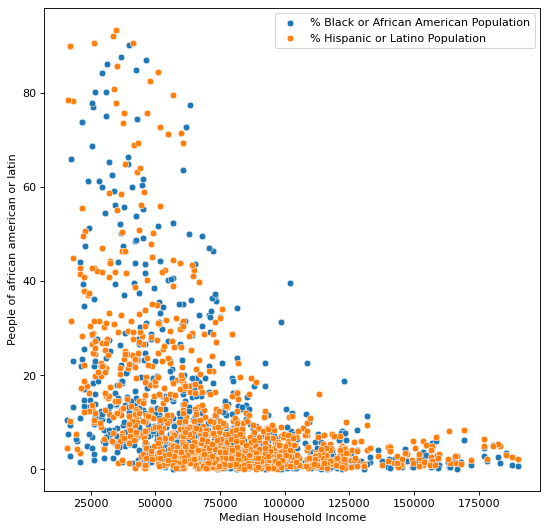

In [43]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(y="aa_p", x="mhi",label='% Black or African American Population', data=data_4)

ax = sns.scatterplot(y="lat_p", x="mhi",label='% Hispanic or Latino Population', data=data_4)
plt.xlabel('Median Household Income')
plt.ylabel('People of african american or latin')
plt.show()

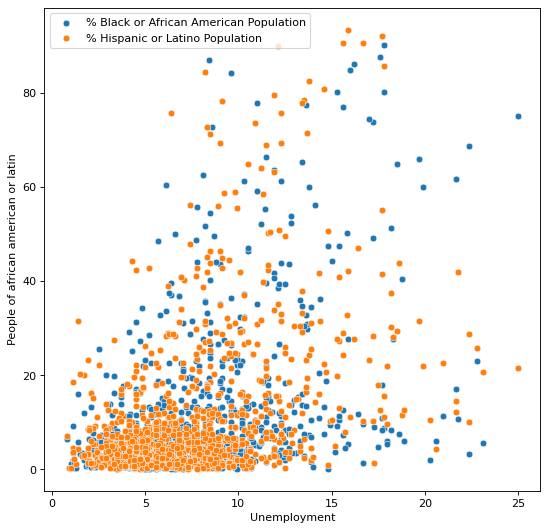

In [44]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(y="aa_p", x="unemp_p",label='% Black or African American Population', data=data_4)

ax = sns.scatterplot(y="lat_p", x="unemp_p",label='% Hispanic or Latino Population', data=data_4)
plt.xlabel('Unemployment')
plt.ylabel('People of african american or latin')
plt.show()
# Here also unemployment rate high in american african people compare to hispanic or latin people.

### I compare American African people and hispanic people in terms of Unemployment , poverty and Income and I found that the American African people lag in many economic indicator compare to hispanic or latino population  .

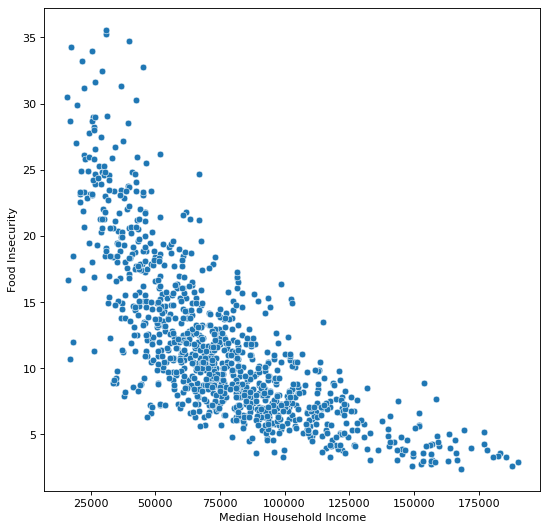

In [45]:
    #Scatterpblot
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="mhi", y="fi_p", data=data_4)
plt.xlabel('Median Household Income')
plt.ylabel('Food Insecurity')
plt.show()
# Obviously people who have high income they have no impact of food insecurity but people those low income they have more effect by food insecurity.

Text(0, 0.5, 'Food Insecurity')

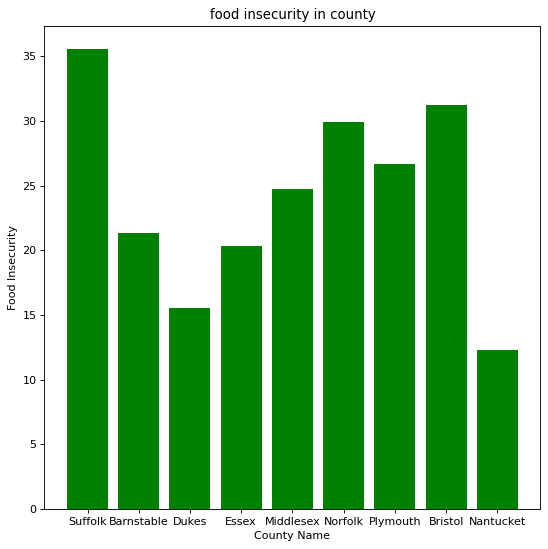

In [46]:
plt.figure(figsize=(8, 8), dpi=80)
plt.bar(data_4['county'], data_4['fi_p'], color='g')
plt.title("food insecurity in county")
plt.xlabel("County Name")
plt.ylabel("Food Insecurity")
  # In this bar plot we can easily say where food insecurity high and where less.

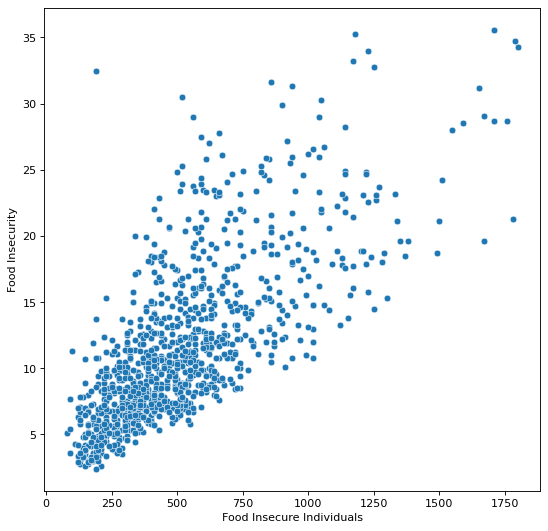

In [47]:
    
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="fi_num", y="fi_p", data=data_4)
plt.xlabel('Food Insecure Individuals')
plt.ylabel('Food Insecurity')
plt.show()
# Food insecure  is propotional to food insecurity individuals.

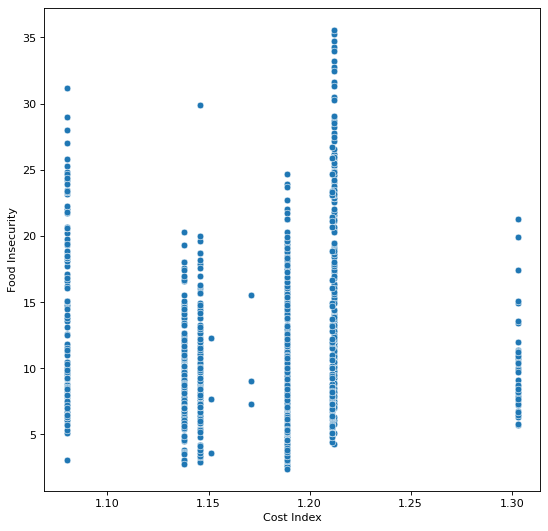

In [48]:
plt.figure(figsize=(8, 8), dpi=80)
ax = sns.scatterplot(x="cost_index", y="fi_p", data=data_4)
plt.xlabel('Cost Index')
plt.ylabel('Food Insecurity')
plt.show()

Text(0, 0.5, 'Food Insecurity')

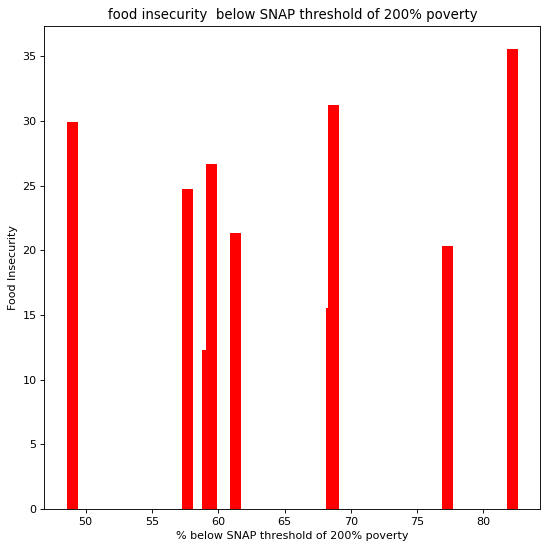

In [49]:
plt.figure(figsize=(8, 8), dpi=80)
plt.bar(data_4['snapbelowp'], data_4['fi_p'], color='r')
plt.title("food insecurity  below SNAP threshold of 200% poverty")
plt.xlabel("% below SNAP threshold of 200% poverty")
plt.ylabel("Food Insecurity")
  # In this bar plot we can easily say where food insecurity high and where less.
 # vice versa for above SNAP threshold of 200% poverty